# 2. Pré-processamento dos Dados

In [26]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder


In [27]:

orders = pd.read_csv('../dataset/olist_orders_dataset.csv')
sellers = pd.read_csv('../dataset/olist_sellers_dataset.csv')
customers = pd.read_csv('../dataset/olist_customers_dataset.csv')
geolocation = pd.read_csv('../dataset/olist_geolocation_dataset.csv')
products = pd.read_csv('../dataset/olist_products_dataset.csv')
orders_items = pd.read_csv('../dataset/olist_order_items_dataset.csv')

df = pd.merge(orders, customers, on='customer_id', how='left')

In [28]:

df = pd.merge(orders, customers, on='customer_id', how='left')
df = pd.merge(df, orders_items, on='order_id', how='left')
df = pd.merge(df, sellers, on='seller_id', how='left')
df = pd.merge(df, products, on='product_id', how='left')
geo = geolocation.drop_duplicates(subset='geolocation_zip_code_prefix')
df = pd.merge(df, geo, left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='left')


In [29]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,4.0,500.0,19.0,8.0,13.0,3149.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,400.0,19.0,13.0,19.0,47813.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,420.0,24.0,19.0,21.0,75265.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,3.0,450.0,30.0,10.0,20.0,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,4.0,250.0,51.0,15.0,15.0,9195.0,-23.675037,-46.524784,santo andre,SP


In [30]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
seller_zip_code_prefix            775
seller_city                       775
seller_state                      775
product_category_name            2378
product_name_lenght              2378
product_description_lenght       2378
product_photos_qty               2378
product_weight_g                  793
product_leng

In [31]:
df = df[df.order_status == 'delivered'].dropna()

# formatando as colunas que tem string
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'], errors='coerce')

# simpleImputer para preencher os valores ausentes com a mediana, pq mds do ceu...
imputer = SimpleImputer(strategy='median')
df['order_delivered_customer_date'] = imputer.fit_transform(df[['order_delivered_customer_date']])

# garantir o datetime para manipular os dados
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [32]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,500.0,19.0,8.0,13.0,3149.0,-23.574809,-46.587471,sao paulo,SP,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,400.0,19.0,13.0,19.0,47813.0,-12.169860,-44.988369,barreiras,BA,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,420.0,24.0,19.0,21.0,75265.0,-16.746337,-48.514624,vianopolis,GO,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,450.0,30.0,10.0,20.0,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,250.0,51.0,15.0,15.0,9195.0,-23.675037,-46.524784,santo andre,SP,2


(array([9.4644e+04, 1.2117e+04, 1.3150e+03, 1.7900e+02, 4.0000e+01,
        1.5000e+01, 1.5000e+01, 5.0000e+00, 1.5000e+01, 8.0000e+00]),
 array([  0. ,  20.9,  41.8,  62.7,  83.6, 104.5, 125.4, 146.3, 167.2,
        188.1, 209. ]),
 <BarContainer object of 10 artists>)

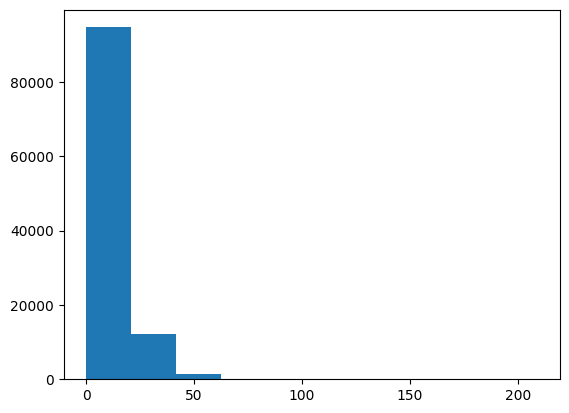

In [33]:
df.drop(df[df.delivery_time < 0].index, inplace=True)
plt.hist(df['delivery_time'])

<Axes: ylabel='delivery_time'>

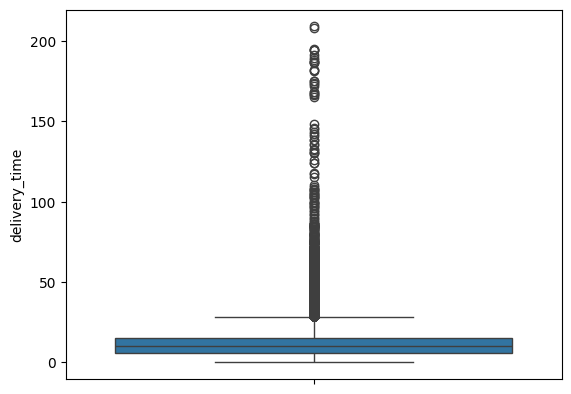

In [34]:
sns.boxplot(df['delivery_time'])

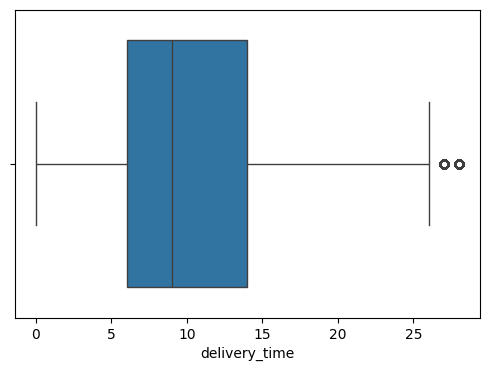

In [35]:
q1 = df['delivery_time'].quantile(0.25)
q3 = df['delivery_time'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

df = df[(df['delivery_time'] >= lower_bound) & (df['delivery_time'] <= upper_bound)]

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['delivery_time'])
plt.show()

In [36]:
# usar em caso de padronizacao para machine learning como o KNN na parte do treinamento... por agr nao tem utilidade
# scaler = StandardScaler()
# print(scaler.fit_transform(df[['delivery_time']]))
# df[['delivery_time']] = scaler.fit_transform(df[['delivery_time']])


# encoder = OneHotEncoder(sparse_output=False)
# encoded_order_status = encoder.fit_transform(df[['order_status']])
# df_encoded = pd.DataFrame(encoded_order_status, columns=encoder.get_feature_names_out(['order_status']))

# df = pd.concat([df, df_encoded], axis=1)

In [37]:
le_state = LabelEncoder()
df['customer_state_encoded'] = le_state.fit_transform(df['customer_state'])
df['seller_state_encoded'] = le_state.fit_transform(df['seller_state'])

le_category = LabelEncoder()
df['product_category_name_encoded'] = le_category.fit_transform(df['product_category_name'])

In [38]:
if not os.path.exists('../dataset/dados_tratados.csv'):
    df.to_csv('../dataset/dados_tratados.csv', index=False)
else:
    print(f'Arquivo ja criado no diretorio dataset... vai la olhar!')
    pass

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,product_width_cm,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,delivery_time,customer_state_encoded,seller_state_encoded,product_category_name_encoded
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,13.0,3149.0,-23.574809,-46.587471,sao paulo,SP,8,25,21,72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,19.0,47813.0,-12.169860,-44.988369,barreiras,BA,13,4,21,62
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,21.0,75265.0,-16.746337,-48.514624,vianopolis,GO,9,8,21,8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,...,20.0,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN,13,19,7,63
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,15.0,9195.0,-23.675037,-46.524784,santo andre,SP,2,25,21,59
